In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import math

results = None
with open('../results/large_interpolated_16k.json', 'r') as f:
  results = json.load(f)['results']
flat = [r for env_r in results for r_r in env_r for r in r_r]
df = pd.DataFrame(flat)
df

,None-1-1,None-1-2,None-1-inf,EPIC-1-1,EPIC-1-2,EPIC-1-inf,DARD-1-1,DARD-1-2,DARD-1-inf,None-2-1,...,DARD-0-2,DARD-0-inf,Minimal-1-1,Minimal-1-2,Minimal-1-inf,Minimal-2-1,Minimal-2-2,Minimal-2-inf,regret1,regret2
0,0.056557,0.001121,0.000057,0.049739,0.000970,0.000056,0.051182,0.001001,0.000057,2.873128,...,5.199953,0.340650,0.054312,0.001070,0.000071,2.551088,0.049816,0.002917,0.024238,-0.018329
1,0.120785,0.002389,0.000121,0.106229,0.002072,0.000119,0.109167,0.002134,0.000125,6.129544,...,10.399905,0.681300,0.109870,0.002156,0.000138,5.449294,0.106424,0.006249,0.016681,0.022459
2,0.193664,0.003821,0.000190,0.170463,0.003325,0.000193,0.174855,0.003416,0.000203,9.814260,...,15.599858,1.021950,0.176811,0.003465,0.000234,8.744664,0.170821,0.010135,0.038038,-0.008277
3,0.275942,0.005428,0.000264,0.243460,0.004750,0.000278,0.249029,0.004863,0.000296,13.958871,...,20.799811,1.362600,0.249533,0.004898,0.000315,12.487314,0.243987,0.014573,0.035727,0.015638
4,0.367818,0.007215,0.000341,0.325931,0.006363,0.000374,0.332395,0.006489,0.000403,18.576410,...,25.999764,1.703250,0.331567,0.006495,0.000411,16.717311,0.326752,0.019632,0.080317,0.015634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,1.996357,0.447142,0.209763,1.572614,0.135066,0.062710,1.852192,0.136966,0.060802,57.488694,...,171.466840,10.167174,1.928081,0.414080,0.194230,53.326010,1.397786,0.468546,0.773930,0.506956
16380,1.996480,0.447170,0.209776,1.573067,0.135134,0.062742,1.852729,0.137031,0.060832,57.495871,...,185.755743,11.014439,1.928392,0.414149,0.194253,53.338415,1.400263,0.470173,0.869431,0.514598
16381,1.996586,0.447194,0.209787,1.573455,0.135191,0.062769,1.853188,0.137087,0.060858,57.501920,...,200.044646,11.861703,1.928684,0.414207,0.194279,53.348439,1.402382,0.471569,0.796677,0.533316
16382,1.996678,0.447214,0.209797,1.573792,0.135241,0.062793,1.853586,0.137136,0.060880,57.507085,...,214.333550,12.708968,1.928810,0.414259,0.194304,53.356836,1.404217,0.472779,0.802532,0.547379


In [2]:
# add regret (average of regret1 and regret2)
df['regret'] = (df['regret1'] + df['regret2']) / 2
df = df.drop(['regret1', 'regret2'], axis=1)
df.head()

,None-1-1,None-1-2,None-1-inf,EPIC-1-1,EPIC-1-2,EPIC-1-inf,DARD-1-1,DARD-1-2,DARD-1-inf,None-2-1,...,DARD-0-1,DARD-0-2,DARD-0-inf,Minimal-1-1,Minimal-1-2,Minimal-1-inf,Minimal-2-1,Minimal-2-2,Minimal-2-inf,regret
0,0.056557,0.001121,0.000057,0.049739,0.000970,0.000056,0.051182,0.001001,0.000057,2.873128,...,266.989002,5.199953,0.34065,0.054312,0.001070,0.000071,2.551088,0.049816,0.002917,0.002955
1,0.120785,0.002389,0.000121,0.106229,0.002072,0.000119,0.109167,0.002134,0.000125,6.129544,...,533.978003,10.399905,0.68130,0.109870,0.002156,0.000138,5.449294,0.106424,0.006249,0.019570
2,0.193664,0.003821,0.000190,0.170463,0.003325,0.000193,0.174855,0.003416,0.000203,9.814260,...,800.967005,15.599858,1.02195,0.176811,0.003465,0.000234,8.744664,0.170821,0.010135,0.014880
3,0.275942,0.005428,0.000264,0.243460,0.004750,0.000278,0.249029,0.004863,0.000296,13.958871,...,1067.956006,20.799811,1.36260,0.249533,0.004898,0.000315,12.487314,0.243987,0.014573,0.025683
4,0.367818,0.007215,0.000341,0.325931,0.006363,0.000374,0.332395,0.006489,0.000403,18.576410,...,1334.945008,25.999764,1.70325,0.331567,0.006495,0.000411,16.717311,0.326752,0.019632,0.047976


In [3]:
# remove baselines
df = df[[c for c in df.columns if '0' not in c and 'None' not in c]]

In [4]:
# sort by regret value
df = df.sort_values(by='regret')

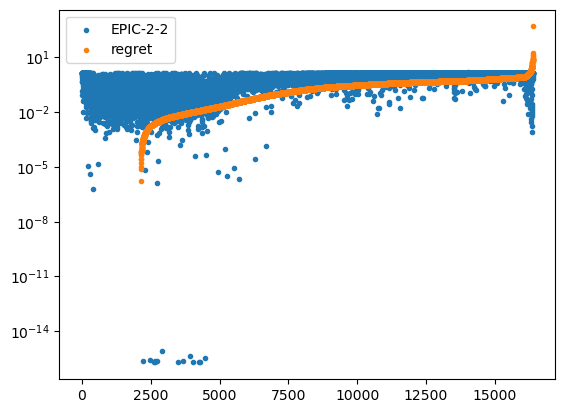

In [5]:
x_axis = np.arange(df.shape[0])
columns = ['EPIC-2-2', 'regret']
for key in columns:
  plt.scatter(x_axis, df[key], label=key, marker='.')
plt.yscale('log')
plt.legend(columns)
plt.show()

In [6]:
corrs = df.corr()
corrs

,EPIC-1-1,EPIC-1-2,EPIC-1-inf,DARD-1-1,DARD-1-2,DARD-1-inf,EPIC-2-1,EPIC-2-2,EPIC-2-inf,DARD-2-1,...,DARD-inf-1,DARD-inf-2,DARD-inf-inf,Minimal-1-1,Minimal-1-2,Minimal-1-inf,Minimal-2-1,Minimal-2-2,Minimal-2-inf,regret
EPIC-1-1,1.000000,0.672922,0.494830,0.985086,0.545437,0.394935,0.899288,0.938844,0.508288,0.904472,...,0.731315,0.736767,0.661869,0.977737,0.569400,0.484465,0.897683,0.938831,0.507751,0.045595
EPIC-1-2,0.672922,1.000000,0.945221,0.756747,0.884206,0.791110,0.330357,0.556813,0.892547,0.346181,...,0.145270,0.156135,0.214267,0.758162,0.969542,0.921643,0.327219,0.556778,0.892162,0.036403
EPIC-1-inf,0.494830,0.945221,1.000000,0.582267,0.891529,0.890508,0.162164,0.376222,0.878996,0.176188,...,0.004785,0.011926,0.071487,0.578691,0.937228,0.978292,0.159899,0.376203,0.878195,0.023494
DARD-1-1,0.985086,0.756747,0.582267,1.000000,0.639624,0.479254,0.833104,0.908182,0.590062,0.842738,...,0.652800,0.659573,0.604844,0.986459,0.665435,0.571757,0.831136,0.908166,0.589542,0.042914
DARD-1-2,0.545437,0.884206,0.891529,0.639624,1.000000,0.951629,0.231082,0.422806,0.776065,0.238708,...,0.066154,0.075161,0.122355,0.622562,0.869734,0.875701,0.228768,0.422782,0.775150,0.017989
DARD-1-inf,0.394935,0.791110,0.890508,0.479254,0.951629,1.000000,0.116076,0.283648,0.721266,0.121652,...,-0.015711,-0.009762,0.033737,0.459243,0.788374,0.875902,0.114734,0.283638,0.719566,0.009922
EPIC-2-1,0.899288,0.330357,0.162164,0.833104,0.231082,0.116076,1.000000,0.938109,0.256549,0.998716,...,0.922931,0.921909,0.795006,0.800972,0.188587,0.138863,0.999949,0.938114,0.256011,0.036313
EPIC-2-2,0.938844,0.556813,0.376222,0.908182,0.422806,0.283648,0.938109,1.000000,0.530490,0.944566,...,0.870428,0.878639,0.839929,0.869818,0.406485,0.332952,0.936186,0.999998,0.529957,0.046535
EPIC-2-inf,0.508288,0.892547,0.878996,0.590062,0.776065,0.721266,0.256549,0.530490,1.000000,0.275167,...,0.210920,0.222719,0.341629,0.557717,0.825370,0.812073,0.253134,0.530476,0.999785,0.033315
DARD-2-1,0.904472,0.346181,0.176188,0.842738,0.238708,0.121652,0.998716,0.944566,0.275167,1.000000,...,0.922447,0.921934,0.799436,0.808079,0.203430,0.151370,0.998537,0.944575,0.274629,0.036447


In [7]:
corrs['regret'].sort_values(ascending=False)

regret           1.000000
EPIC-2-2         0.046535
Minimal-2-2      0.046531
DARD-2-2         0.046377
EPIC-1-1         0.045595
Minimal-1-1      0.044492
DARD-1-1         0.042914
EPIC-inf-inf     0.038770
DARD-inf-inf     0.038541
DARD-2-1         0.036447
EPIC-1-2         0.036403
EPIC-2-1         0.036313
Minimal-2-1      0.036094
EPIC-2-inf       0.033315
Minimal-2-inf    0.033283
DARD-2-inf       0.032967
EPIC-inf-2       0.032851
DARD-inf-2       0.032761
EPIC-inf-1       0.031495
DARD-inf-1       0.031351
Minimal-1-2      0.029420
EPIC-1-inf       0.023494
Minimal-1-inf    0.021668
DARD-1-2         0.017989
DARD-1-inf       0.009922
Name: regret, dtype: float64

In [8]:
corrs['EPIC-2-2'].sort_values(ascending=False)

EPIC-2-2         1.000000
Minimal-2-2      0.999998
DARD-2-2         0.999514
DARD-2-1         0.944566
EPIC-1-1         0.938844
EPIC-2-1         0.938109
Minimal-2-1      0.936186
DARD-1-1         0.908182
DARD-inf-2       0.878639
EPIC-inf-2       0.873163
DARD-inf-1       0.870428
Minimal-1-1      0.869818
EPIC-inf-1       0.864956
DARD-inf-inf     0.839929
EPIC-inf-inf     0.833153
EPIC-1-2         0.556813
DARD-2-inf       0.535202
EPIC-2-inf       0.530490
Minimal-2-inf    0.529957
DARD-1-2         0.422806
Minimal-1-2      0.406485
EPIC-1-inf       0.376222
Minimal-1-inf    0.332952
DARD-1-inf       0.283648
regret           0.046535
Name: EPIC-2-2, dtype: float64

In [9]:
corrs['EPIC-1-1'].sort_values(ascending=False)

EPIC-1-1         1.000000
DARD-1-1         0.985086
Minimal-1-1      0.977737
DARD-2-2         0.939211
EPIC-2-2         0.938844
Minimal-2-2      0.938831
DARD-2-1         0.904472
EPIC-2-1         0.899288
Minimal-2-1      0.897683
DARD-inf-2       0.736767
DARD-inf-1       0.731315
EPIC-inf-2       0.729496
EPIC-inf-1       0.724099
EPIC-1-2         0.672922
DARD-inf-inf     0.661869
EPIC-inf-inf     0.653005
Minimal-1-2      0.569400
DARD-1-2         0.545437
DARD-2-inf       0.513844
EPIC-2-inf       0.508288
Minimal-2-inf    0.507751
EPIC-1-inf       0.494830
Minimal-1-inf    0.484465
DARD-1-inf       0.394935
regret           0.045595
Name: EPIC-1-1, dtype: float64

In [10]:
df.columns

Index(['EPIC-1-1', 'EPIC-1-2', 'EPIC-1-inf', 'DARD-1-1', 'DARD-1-2',
       'DARD-1-inf', 'EPIC-2-1', 'EPIC-2-2', 'EPIC-2-inf', 'DARD-2-1',
       'DARD-2-2', 'DARD-2-inf', 'EPIC-inf-1', 'EPIC-inf-2', 'EPIC-inf-inf',
       'DARD-inf-1', 'DARD-inf-2', 'DARD-inf-inf', 'Minimal-1-1',
       'Minimal-1-2', 'Minimal-1-inf', 'Minimal-2-1', 'Minimal-2-2',
       'Minimal-2-inf', 'regret'],
      dtype='object')

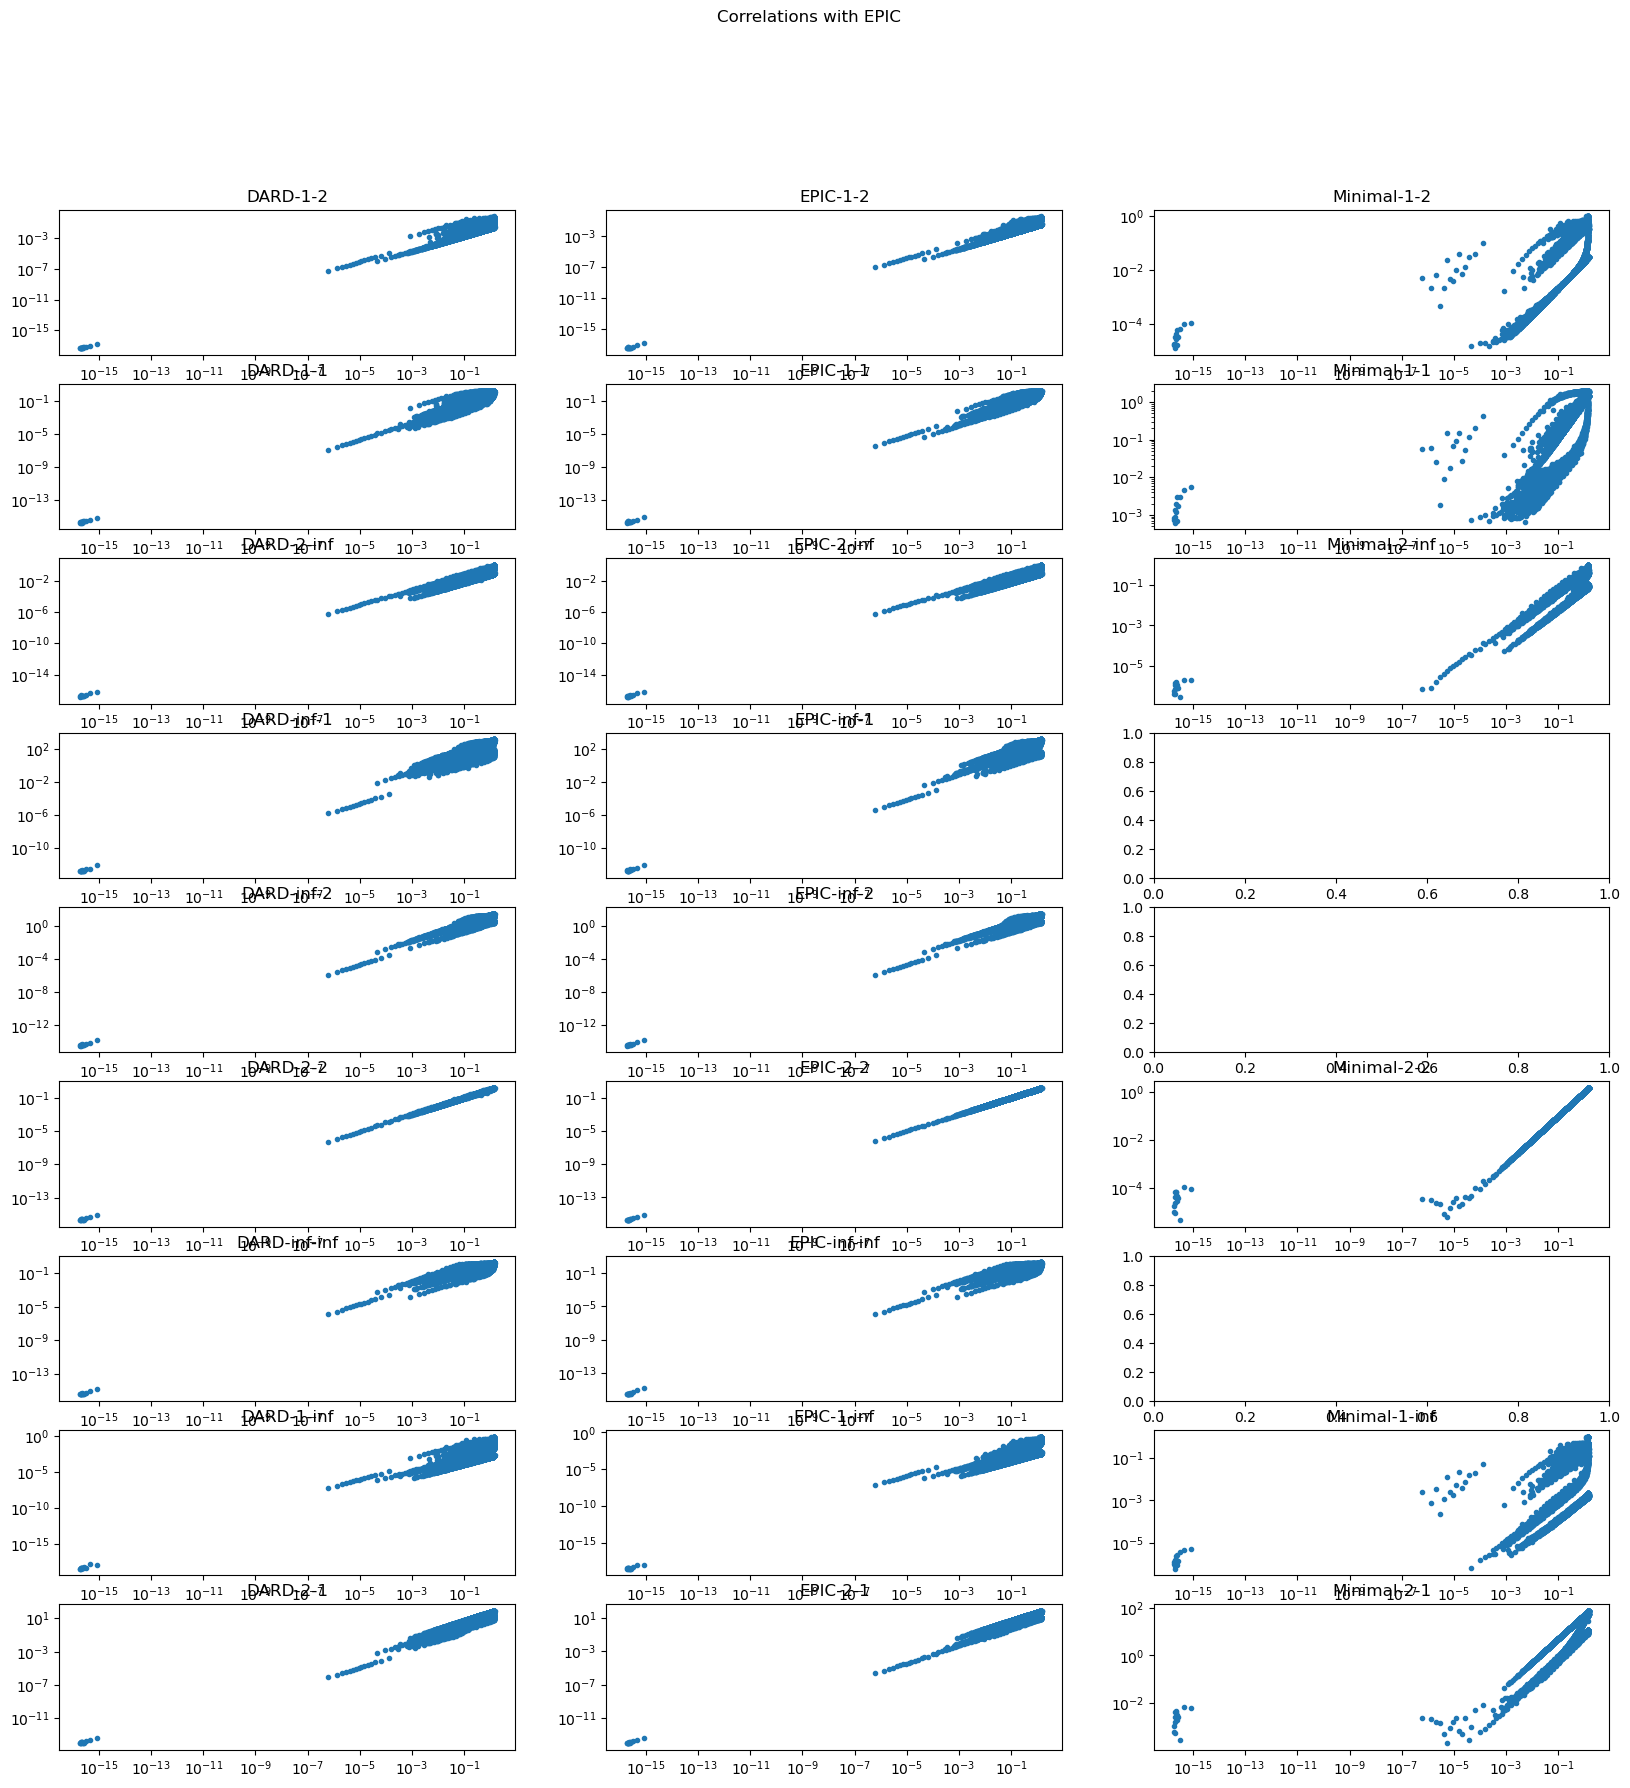

In [11]:
canons = set([col.split('-')[0] for col in df.columns if col != 'regret'])
norms = set(['-'.join(col.split('-')[1:]) for col in df.columns if col != 'regret'])
fig, ax = plt.subplots(ncols=len(canons), nrows=len(norms), figsize=(20, 20))
for i, canon in enumerate(canons):
  for j, norm in enumerate(norms):
    key = canon + '-' + norm
    if key not in df.columns:
      continue
    ax[j][i].scatter(df['EPIC-2-2'], df[key], label=key, marker='.')
    ax[j][i].set_title(key)
    ax[j][i].set_xscale('log')
    ax[j][i].set_yscale('log')

fig.suptitle('Correlations with EPIC')

plt.show()